<a href="https://colab.research.google.com/github/BotchaSravani/Job-Market-Insights-Trends-Skills-and-Salaries/blob/main/Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.9 MB/s eta 0:00:00


In [2]:
#Importing the libraries

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading the data and assigning it to a variable
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [4]:
#Filtering for data in the United States

df_US = df[df['job_location'] == 'United States'].dropna(subset=['salary_year_avg'])

In [21]:
job_titles = df_US['job_title_short'].value_counts().index[0:7].tolist()
job_titles.remove('Machine Learning Engineer')
job_titles

['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Data Analyst',
 'Senior Data Analyst']

In [34]:
#Creating a new dataframe with job_title_short == [job_titles]

df_US_6 = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_US_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).reset_index()

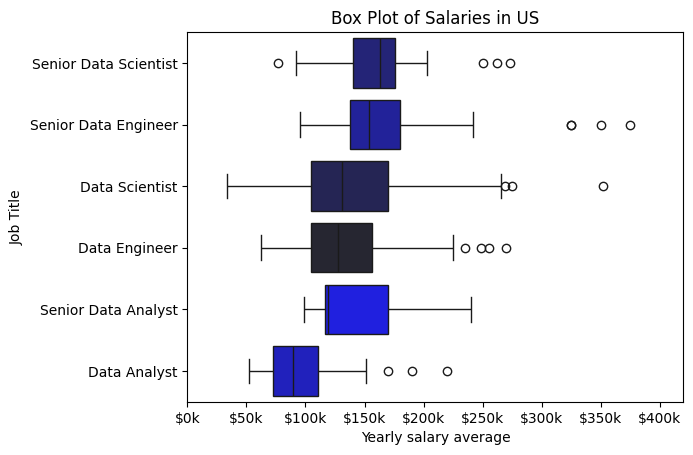

In [38]:
#Plotting

sns.boxplot(data=df_US_6, x='salary_year_avg', y='job_title_short', hue = 'job_title_short', palette='dark:blue', order = job_order['job_title_short'])
plt.title('Box Plot of Salaries in US')
plt.xlim(0, 420000)
plt.ylabel('Job Title')
plt.xlabel('Yearly salary average')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()